In [2]:
%matplotlib inline

import sys
sys.path.append("../")

import numpy as np
import cv2
import matplotlib.pyplot as plt
import glob

from utils import transformations
from utils import vis_utils

In [3]:
labels_info_path = "../data/labels_info.npy"
partition_path = "../data/partition.npy"

labels_info = np.load(labels_info_path, allow_pickle=True, encoding='latin1').item()
partition = np.load(partition_path, allow_pickle=True, encoding='latin1').item()

In [4]:
img_path_list = glob.glob("../../Dataset/papsmear/SS/*/*.jpg")
print("Num of Images: {}".format(len(img_path_list)))

Num of Images: 937


In [18]:
idx = 222
img_path = img_path_list[idx]
ID = img_path.split("papsmear/")[-1]

labels = labels_info.get(ID)

print(labels)

[['HSIL', 2198, 813, 2278, 918], ['HSIL', 2159, 922, 2213, 980], ['HSIL', 2087, 952, 2145, 1014]]


### Original Image and Ground Truth

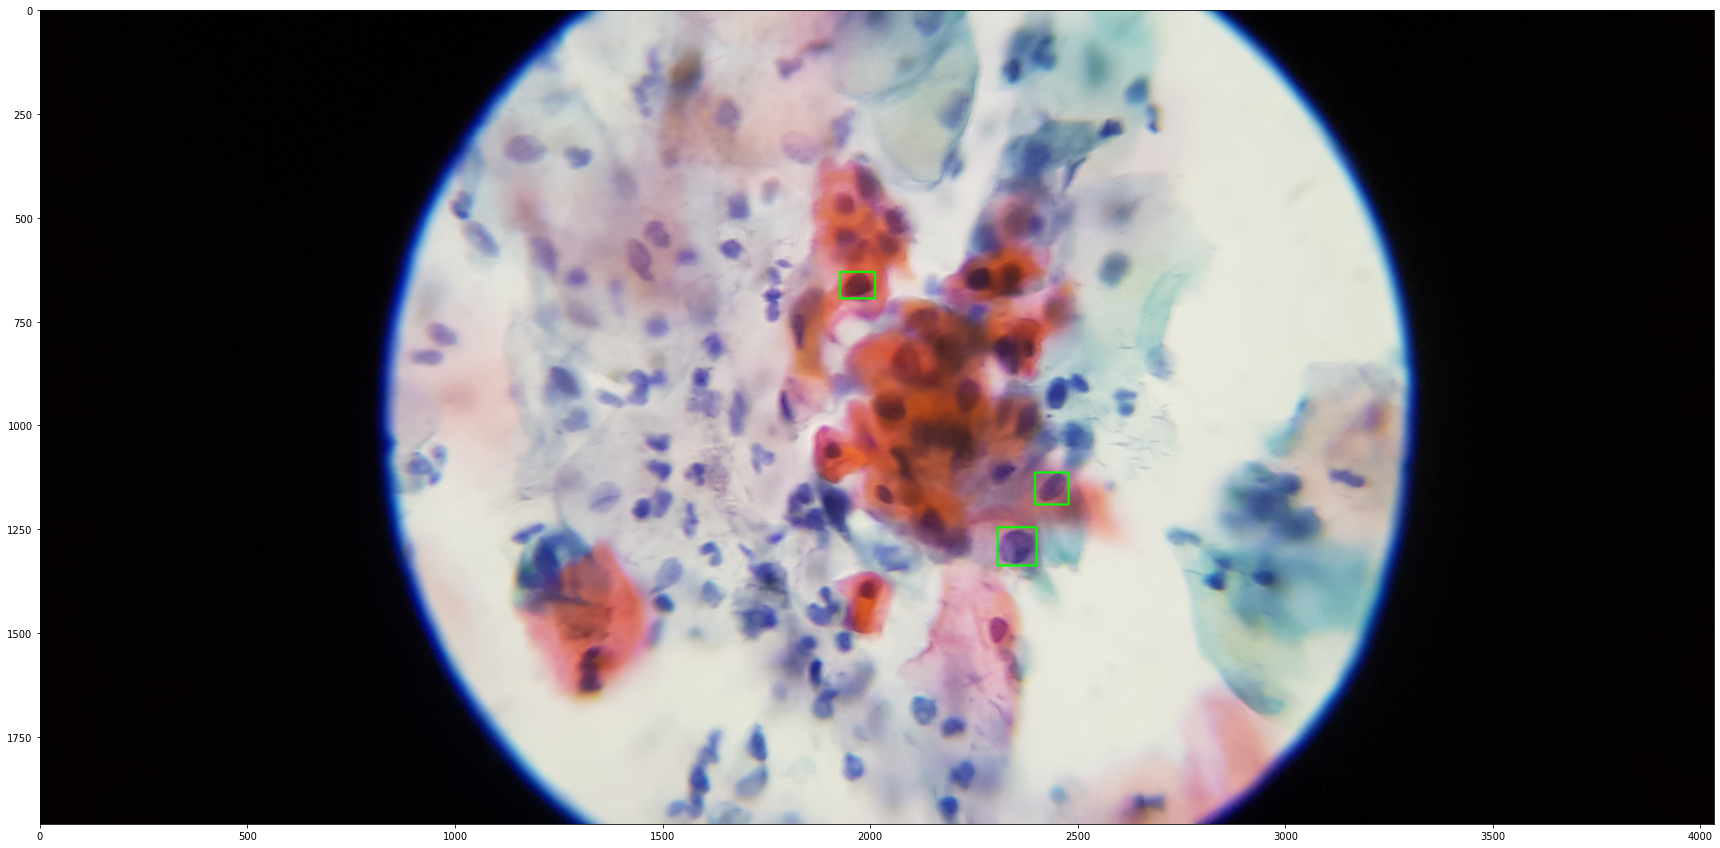

In [12]:
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# print(img.shape)

bbox_points = [label[1:] for label in labels]

img = np.flip(img, 1)
img = np.transpose(img, (1, 0, 2))
img = np.array(img)
# print(img)
vis_img = img.copy()
for bbox_point in bbox_points:
    vis_img = vis_utils.draw_rect(vis_img, bbox_point, is_normalized=False)

    
plt.figure(figsize=(30, 30))
plt.imshow(vis_img)

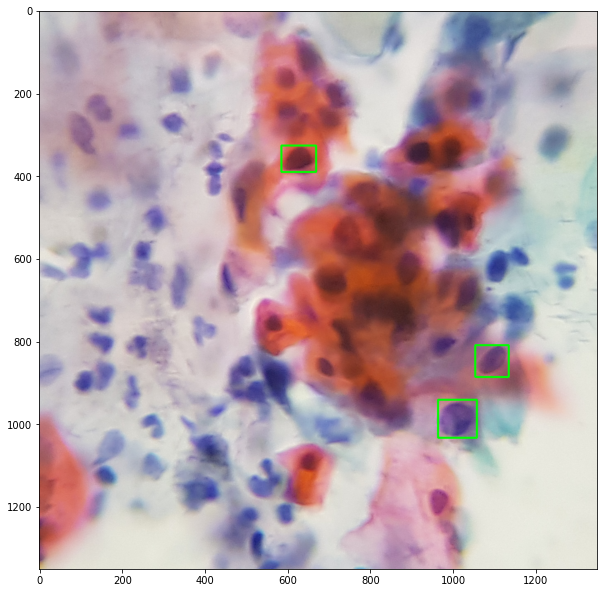

In [52]:
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# print(img.shape)

crop_img = transformations.crop_image(img)
bbox_points = [transformations.transform_bbox_points(img, label[1:]) for label in labels]

vis_img = crop_img.copy()
vis_img = np.array(vis_img)
for bbox_point in bbox_points:
    vis_img = vis_utils.draw_rect(vis_img, bbox_point, is_normalized=False)

    
plt.figure(figsize=(10, 20))
plt.imshow(vis_img)